In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
model = load_model('NEURAL_NETWORK_MODEL_PHD_EXPERIMENT.h5',compile=False)

In [4]:
df = pd.read_csv('holdout_sample_PHD.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884210 entries, 0 to 884209
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   state_id                     884210 non-null  int64  
 1   d                            884210 non-null  int64  
 2   sales                        884210 non-null  int64  
 3   month                        884210 non-null  int64  
 4   year                         884210 non-null  int64  
 5   snap_CA                      884210 non-null  int64  
 6   snap_TX                      884210 non-null  int64  
 7   snap_WI                      884210 non-null  int64  
 8   sell_price                   884210 non-null  float64
 9   simple_moving_average        884210 non-null  float64
 10  exp_weighted_moving_average  884210 non-null  float64
 11  cum_moving_average           884210 non-null  float64
 12  total_price                  884210 non-null  float64
dtyp

In [6]:
# drop the sales variable before prediction
df2 = df.drop(['sales'],axis=1)

In [7]:
df2.head()

,state_id,d,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price
0,0,1885,3,2016,0,0,0,8.26,1.071428,1.392841,1.427774,8.26
1,2,1885,3,2016,0,0,0,2.68,1.357143,1.007385,1.427358,2.68
2,0,1885,3,2016,0,0,0,1.00,0.892857,1.434569,1.427874,5.00
3,0,1885,3,2016,0,0,0,2.48,1.928572,3.061044,1.427875,42.16
4,2,1885,3,2016,0,0,0,1.98,1.607143,1.349851,1.427358,0.00


**GET PREDICTED VALUES FOR HYPOTHESIS TESTING**

The testing dataframe will be normalized. The training data was normalized

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
df3 = df2

In [11]:
df3 = scaler.fit_transform(df3)

In [12]:
Neural_prediction = model.predict(df3)

27632/27632 [==============================] - 35s 1ms/step


In [13]:
Neural_prediction = pd.DataFrame(Neural_prediction, columns = ['Neural_prediction'])

In [14]:
Neural_prediction.head()

,Neural_prediction
0,-0.503193
1,0.577431
2,4.434211
3,14.736020
4,0.000076


**CREATE A DATAFRAME CONSISTING OF THE PREDICTIONS AND ACTUAL SALES FOR ANALYSIS**

In [15]:
Neural_prediction = df2.join(Neural_prediction)

In [16]:
Neural_prediction.head()

,state_id,d,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price,Neural_prediction
0,0,1885,3,2016,0,0,0,8.26,1.071428,1.392841,1.427774,8.26,-0.503193
1,2,1885,3,2016,0,0,0,2.68,1.357143,1.007385,1.427358,2.68,0.577431
2,0,1885,3,2016,0,0,0,1.00,0.892857,1.434569,1.427874,5.00,4.434211
3,0,1885,3,2016,0,0,0,2.48,1.928572,3.061044,1.427875,42.16,14.736020
4,2,1885,3,2016,0,0,0,1.98,1.607143,1.349851,1.427358,0.00,0.000076


In [17]:
Neural_prediction['sales'] = df['sales']

In [18]:
Neural_prediction.head()

,state_id,d,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price,Neural_prediction,sales
0,0,1885,3,2016,0,0,0,8.26,1.071428,1.392841,1.427774,8.26,-0.503193,1
1,2,1885,3,2016,0,0,0,2.68,1.357143,1.007385,1.427358,2.68,0.577431,1
2,0,1885,3,2016,0,0,0,1.00,0.892857,1.434569,1.427874,5.00,4.434211,5
3,0,1885,3,2016,0,0,0,2.48,1.928572,3.061044,1.427875,42.16,14.736020,17
4,2,1885,3,2016,0,0,0,1.98,1.607143,1.349851,1.427358,0.00,0.000076,0


The prediction will be rounded to the nearest integer

In [19]:
Neural_prediction['Neural_prediction'] = Neural_prediction['Neural_prediction'].round(0).astype(int)

In [20]:
Neural_prediction.head(10)

,state_id,d,month,year,snap_CA,snap_TX,snap_WI,sell_price,simple_moving_average,exp_weighted_moving_average,cum_moving_average,total_price,Neural_prediction,sales
0,0,1885,3,2016,0,0,0,8.26,1.071428,1.392841,1.427774,8.26,-1,1
1,2,1885,3,2016,0,0,0,2.68,1.357143,1.007385,1.427358,2.68,1,1
2,0,1885,3,2016,0,0,0,1.00,0.892857,1.434569,1.427874,5.00,4,5
3,0,1885,3,2016,0,0,0,2.48,1.928572,3.061044,1.427875,42.16,15,17
4,2,1885,3,2016,0,0,0,1.98,1.607143,1.349851,1.427358,0.00,0,0
5,0,1885,3,2016,0,0,0,1.00,3.321429,4.260115,1.427876,3.00,2,3
6,2,1885,3,2016,0,0,0,2.56,1.857143,1.823863,1.427358,0.00,0,0
7,0,1885,3,2016,0,0,0,1.00,4.750000,4.979966,1.427876,6.00,5,6
8,2,1885,3,2016,0,0,0,1.38,1.642857,2.004401,1.427358,1.38,1,1
9,0,1885,3,2016,0,0,0,11.98,4.535714,3.263717,1.427876,0.00,0,0


In [21]:
Neural_prediction.to_csv('Neural_prediction_PHD.csv', index=False)

**Actual vs Predicted Values**

<AxesSubplot:xlabel='d', ylabel='Neural_prediction'>

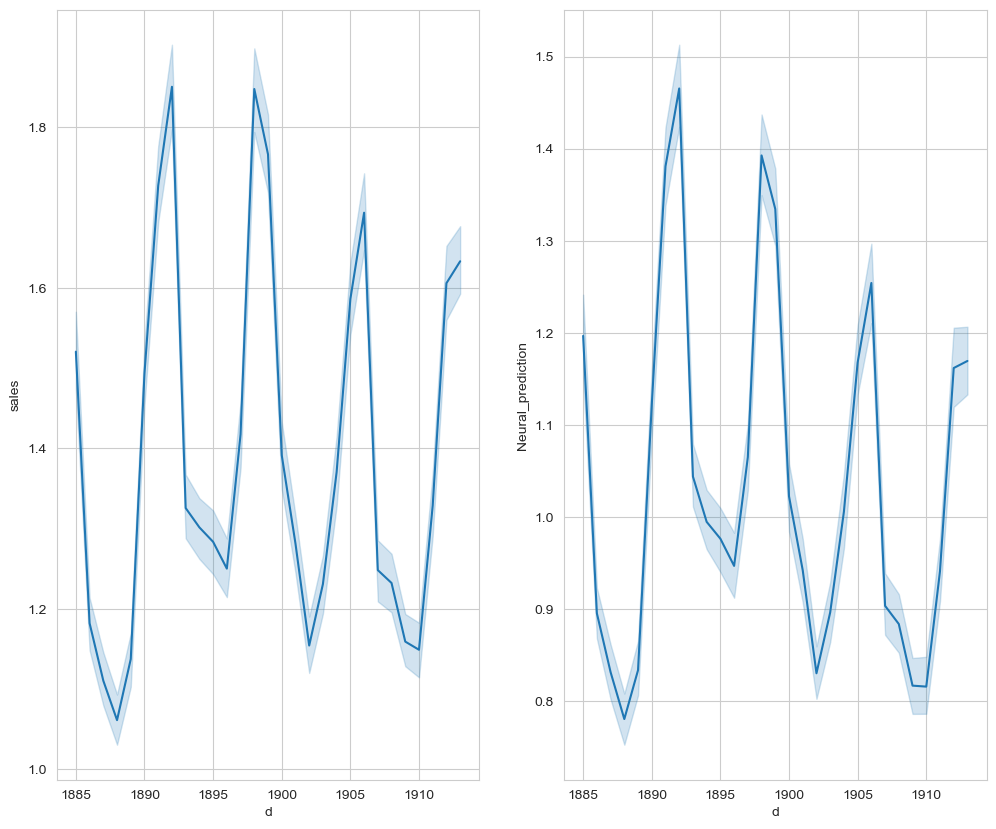

In [22]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2,sharex=True, figsize=(12, 10))
sns.lineplot(x='d', y='sales', data=Neural_prediction,ax=axes[0])
sns.lineplot(x='d', y='Neural_prediction', data=Neural_prediction,ax=axes[1])

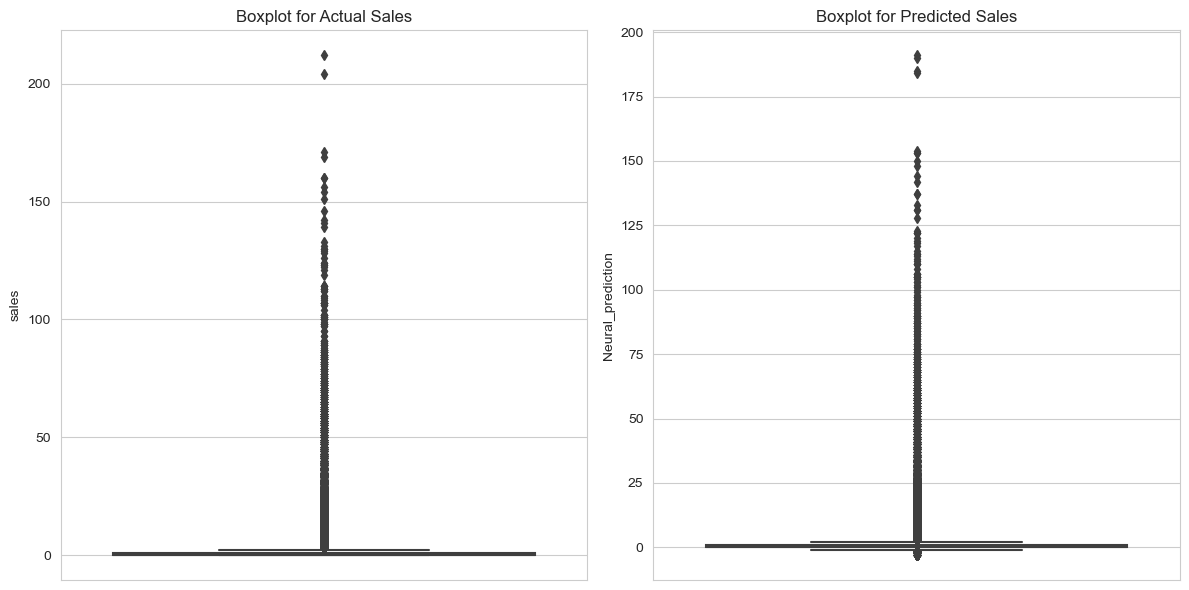

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create box plots
sns.boxplot(y='sales', data=Neural_prediction, ax=axes[0]).set_title('Boxplot for Actual Sales')
sns.boxplot(y='Neural_prediction', data=Neural_prediction, ax=axes[1]).set_title('Boxplot for Predicted Sales')

plt.tight_layout()
plt.show()

In [24]:
# Code to calculate the correlation between 'stack_prediction' and 'sales'
correlation_matrix = Neural_prediction[['Neural_prediction', 'sales']].corr()

# Extract the correlation coefficient between 'stack_prediction' and 'sales'
correlation_coefficient = correlation_matrix.loc['Neural_prediction', 'sales']

correlation_coefficient

0.9813791559866283

In [25]:
# Calculate the five-number summary for 'sales'
sales_summary = Neural_prediction['sales'].describe()

# Calculate the five-number summary for 'Neural_prediction'
Neural_prediction_summary = Neural_prediction['Neural_prediction'].describe()

sales_summary, Neural_prediction_summary

(count    884210.000000
 mean          1.391056
 std           3.630058
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max         212.000000
 Name: sales, dtype: float64,
 count    884210.000000
 mean          1.036992
 std           3.259435
 min          -3.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max         191.000000
 Name: Neural_prediction, dtype: float64)

In [26]:
# Calculate the difference between 'sales' and 'Neural_prediction'
Neural_prediction['difference'] = Neural_prediction['sales'] - Neural_prediction['Neural_prediction']

# Create categories based on the difference
conditions = [
    (Neural_prediction['difference'] < 0), 
    (Neural_prediction['difference'] > 0), 
    (Neural_prediction['difference'] == 0)
]

choices = ['Overestimate', 'Underestimate', 'Accurate']

Neural_prediction['prediction_category'] = np.select(conditions, choices, default=np.nan)

# Count the number of instances in each category
category_counts = Neural_prediction['prediction_category'].value_counts()

print(category_counts)

Accurate         585035
Underestimate    289647
Overestimate       9528
Name: prediction_category, dtype: int64


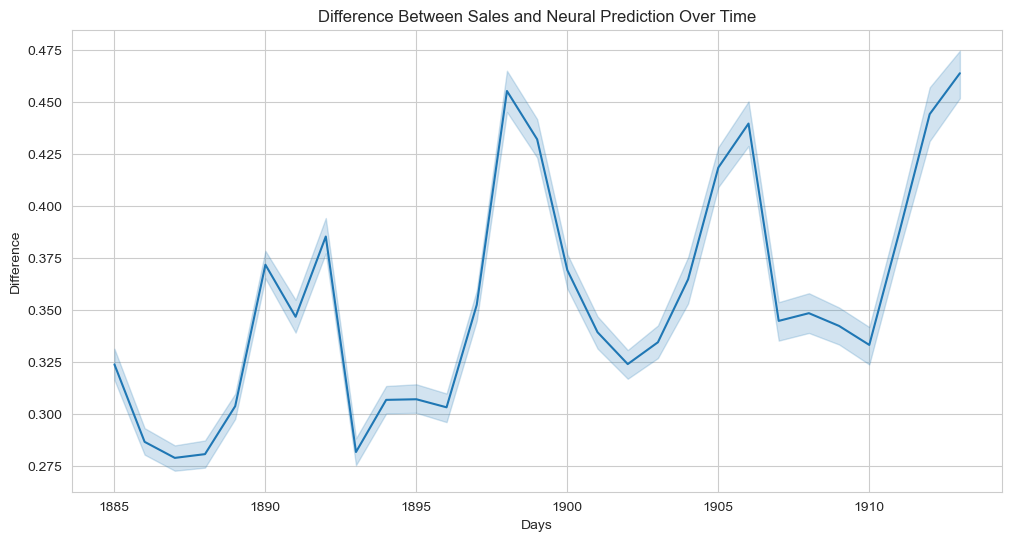

In [27]:
# Calculate the difference between 'sales' and 'Neural_prediction'
Neural_prediction['difference'] = Neural_prediction['sales'] - Neural_prediction['Neural_prediction']

# Create a line plot of the difference over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='d', y='difference', data=Neural_prediction)

# Set labels and title
plt.xlabel('Days')
plt.ylabel('Difference')
plt.title('Difference Between Sales and Neural Prediction Over Time')

# Show the plot
plt.show()

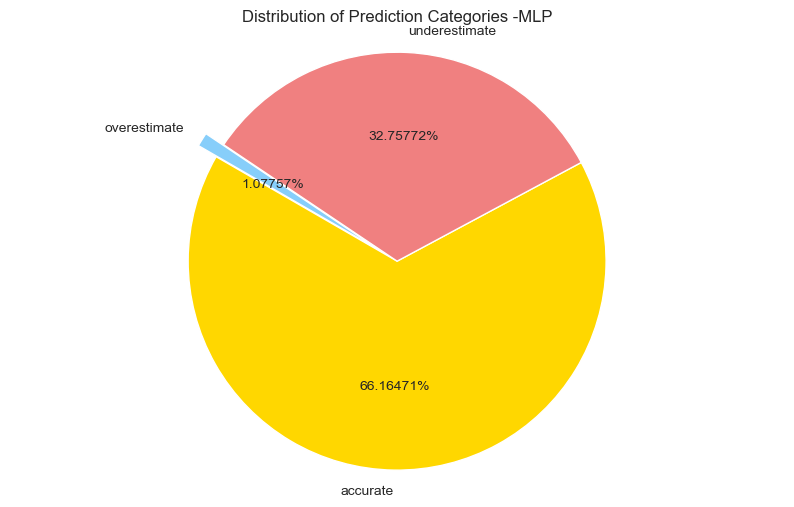

In [28]:
# Define a function to categorize the differences
def categorize_difference(diff):
    if diff == 0:
        return 'accurate'
    elif diff > 0:
        return 'underestimate'
    else:
        return 'overestimate'

# Apply the function to the difference column
Neural_prediction['category'] = Neural_prediction['difference'].apply(categorize_difference)

# Count the number of occurrences for each category
category_counts = Neural_prediction['category'].value_counts()

# Define the labels and sizes from the counts
labels = category_counts.index
sizes = category_counts.values

# Define the colors for each category
colors = ['gold', 'lightcoral', 'lightskyblue']

# Define the explode values for each category
explode = (0, 0, 0.1)  # Only "explode" the 'overestimate' slice (i.e. pull it out a bit)

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.5f%%', startangle=150, explode=explode)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set the title
plt.title('Distribution of Prediction Categories -MLP')

# Show the plot
plt.show()

C:\Users\cobi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


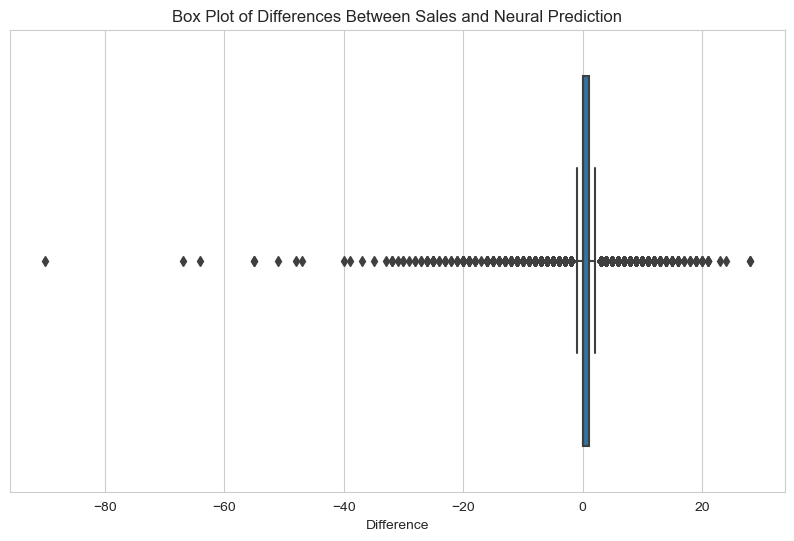

In [29]:
# Calculating the differences
Neural_prediction['difference'] = Neural_prediction['sales'] - Neural_prediction['Neural_prediction']

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(Neural_prediction['difference'])
plt.title('Box Plot of Differences Between Sales and Neural Prediction')
plt.xlabel('Difference')
plt.show()

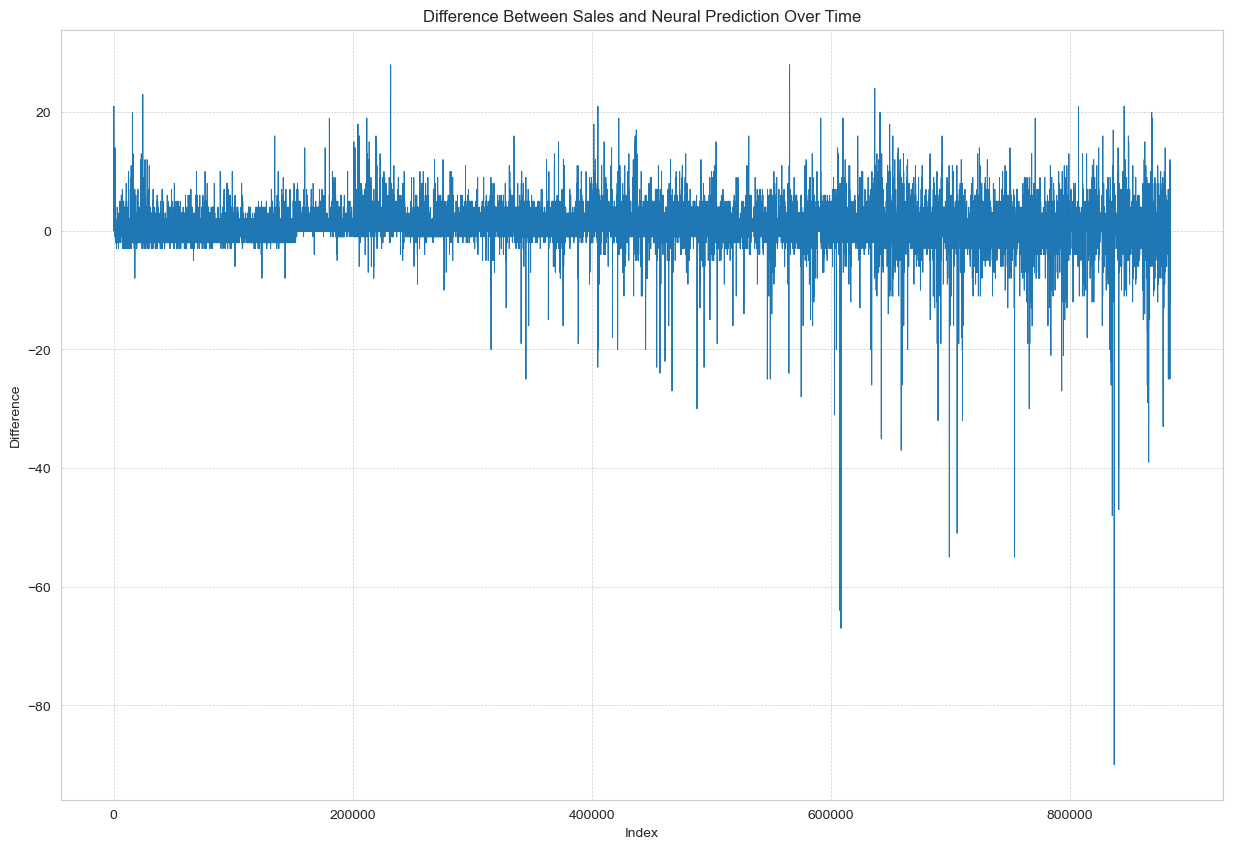

In [30]:
# Plotting the difference between 'sales' and 'Neural_prediction'
plt.figure(figsize=(15, 10))
Neural_prediction['difference'].plot(linewidth=0.7)
plt.title('Difference Between Sales and Neural Prediction Over Time')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

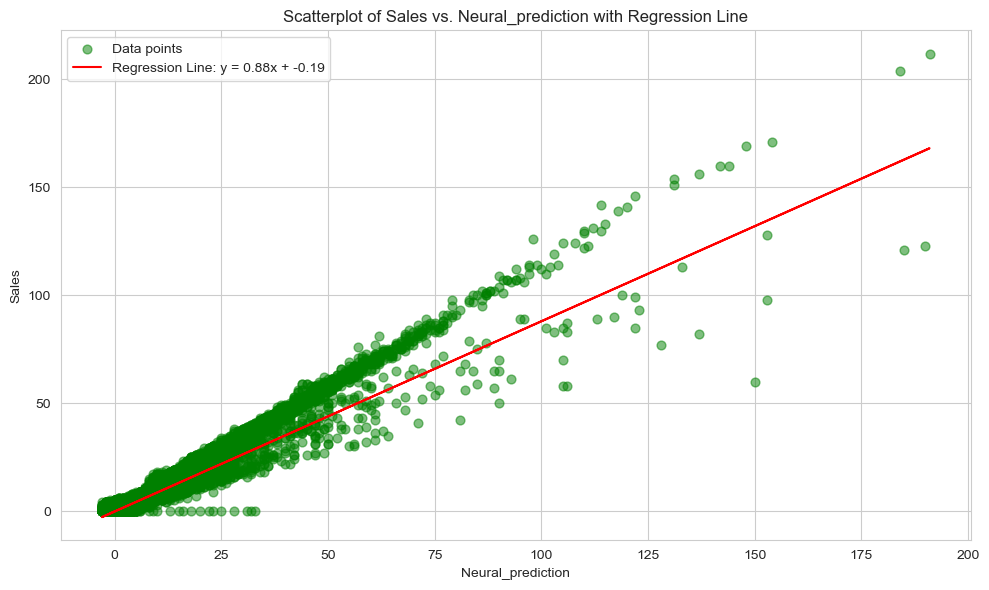

In [31]:
# Calculate the coefficients for the regression line
slope, intercept = np.polyfit(Neural_prediction['sales'], Neural_prediction['Neural_prediction'], 1)

# Create the regression line
regression_line = slope * Neural_prediction['Neural_prediction'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(Neural_prediction['Neural_prediction'], Neural_prediction['sales'], alpha=0.5, color='green', s=40, label='Data points')  # Adjusted the size (s) parameter
plt.plot(Neural_prediction['Neural_prediction'], regression_line, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Scatterplot of Sales vs. Neural_prediction with Regression Line')
plt.xlabel('Neural_prediction')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()